

# Project: Medical Appointment No Shows

> This dataset collects information from 100k medical appointments in Brazil and focuses on whether or not patients show up for their appointment. Several characteristics of the patient are included in each row.


### Content:
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Data Set
The data is contained one file:

_**noshowappointments-kagglev2-may-2016.csv**_
- PatientId (float)- identification number of a patient
- AppointmentID (int) - identification number of each appointment
- Gender(object) - male or female
- AppointmentDay (object) - the day of the actuall appointment, when they have to visit the doctor.
- ScheduledDay (object) - the day someone called or registered the appointment, this is before appointment of course.
- Age (int) - how old is the patient.
- Neighbourhood (object) - where the appointment takes place.
- Scholarship (int) - 0 or 1, indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família
- Hipertension (int) - 0 or 1
- Diabetes (int) - 0 or 1
- Alcoholism (int) - 0 or 1
- Handcap (int) - 0 or 1
- SMS_received (int) - 1 or more messages sent to the patient. 
- No-show (object) - "Yes" or "No", it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

References: https://www.kaggle.com/joniarroba/noshowappointments

<a id='intro'></a>
## Introduction

> Investigation project for __Udacity Nanodegree Program__. I have taken a __Medical Appointment No Shows__ data set for that work.  This dataset contains information from 100k medical appointments in Brazil and focuses on whether or not patients show up at the doctor's office after the patient made an appointment.  The main goal is to analyze the dataset to determine what factors are essential to know to predict if a patient will show up or not?

#### To accomplish this goal, I will answer the following questions:

- Q 1: What is the ratio of appointment showed-up versus not showed-up?

- Q 2: Male or female showed up at the doctor most often?

- Q 3: What is the distribution of the age for the showed-up and not showed-up appointment?

- Q 4: What is the average age for each gender in the showed-up and not showed-up scenarios?

- Q 5: Is there a relationship between diseases and appointments show up?

- Q 6 : Is there a difference between who receives SMS reminders or not?

- Q 7 : What hospitals are the most popular?


In [4]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
import statistics


#### Functions for visualization

In [5]:
def bar_stacked (data, title):
    """Get dataframe and plot vertically stacked bars  with labels
    
    Args:
      data (pandas DataFrame): The DataFrame to plot.
      title (str): The title for the plot.


    Returns:
      plot vertically stacked bars  with labels
    """
    
    # Plot stacked bars
    ax = data.plot(kind='bar', stacked=True)

    # Set labels and legend
    ax.set_title(title, fontsize=15)
    ax.legend(loc='best', fontsize=13)


    # Patches is everything inside of the chart
    for rect in ax.patches:

        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.0f}'

        # ax.text(x, y, text)
        label_x = x + width / 2
        label_y = y + height / 2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(label_x, label_y,
                    label_text, ha='center',
                    va='center', fontsize=13)




In [74]:
def plot_bar(data, xlabel, ylabel, title):
    """Get the data and plot vertical bars

    Args:
      data (pandas DataFrame): The DataFrame with specific columns to plot.
      xlabel (str): The label for x axis.
      ylabel (str): The label for y axis.
      title (str): The title for the plot.
      period (strftime) : The period of time


    Returns:
      plot bars
    """
    # Plotting data
    ax = data.plot.bar(color=color)

    # Set labels and legend
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_title(title, fontsize=15)

    ax.legend(loc='best')
    plt.rc('legend', fontsize=13)

    # Patches is everything inside of the chart
    for rect in ax.patches:
        # Find where everything is located
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()

        # The height of the bar is the data value and can be used as the label
        label_text = f'{height:.0f}'

        # ax.text(x, y, text)
        label_x = x + width/2
        label_y = y + height/2

        # plot only when height is greater than specified value
        if height > 0:
            ax.text(
                label_x,
                label_y,
                label_text,
                ha='center',
                va='center',
                fontsize=13
                )



In [7]:
# Setting the plotting theme
sns.set()
sns.set_theme(style="darkgrid")

# and setting the size of all plots
plt.rcParams['figure.figsize'] = 15, 5

# and setting the colors
color = ["#4b85a8", "#d98100", "#aba597"]


In [8]:
# Read the csv file
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")


<a id='wrangling'></a>
## Data Wrangling

> ####  Validate Data
> - read df
> - display a summary of the df
> - display shape of df


In [9]:
# Inspect data
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [10]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [11]:
# Examine the shape
df.shape


(110527, 14)

In [12]:
# Print data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [13]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> The data set has __110527 rows and 14 columns.__ It seems like df doesn't have a missing value, but we will double-check it later. 
"ScheduledDay"  and "AppointmentDay" date appears like objects and should be changed into the __DateTime type.__ The describe() function shows that __37 years old is the average age__ of the df. Also, we can see a minimum age of - 1, which is a mistake, and we will fix it in the data cleaning section.


### Data Cleaning

- dropping or filling missing values 
- rename the columns
- changing the types of values
- handling outliers
- detecting and reducing duplications

In [14]:
df.head(1)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [15]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [16]:
# Rename columns
df.rename(columns = {'PatientId': "Patient_Id","AppointmentID": "Appointment_ID",
                     "ScheduledDay": "Scheduled_Day", "AppointmentDay" : "Appointment_Day",
                      "No-show": "No_show"}, inplace = True)

df.columns= df.columns.str.strip().str.lower()


Replacing "patient_id" values into simple numerical for further clearness.

In [17]:
# Converting to the dictionary
patient_id_dict = df.patient_id.to_dict()

# Swap keys and values in the dictionary
patient_id_dict = dict([(value, key+1) for key, value in patient_id_dict.items()])


In [18]:
# Replace patient_id values
df['patient_id'] = df['patient_id'].replace(patient_id_dict)


In [19]:
# Change the data type of patient_id to int
df["patient_id"] = df["patient_id"].astype("int64")


In [20]:
# Converting the 'scheduled_day' and 'appointment_day' columns using pd.to_datetime function.
df['scheduled_day']= pd.to_datetime(df['scheduled_day'])
df['appointment_day']= pd.to_datetime(df['appointment_day'])


In [21]:
# Changing the 'scheduled_day' and 'appointment_day'columns to dates
df['scheduled_day'] = df['scheduled_day'].dt.date
df['appointment_day']= df['appointment_day'].dt.date


In [22]:
# Create a new column with different days
df["diff_days"]= (df["appointment_day"] - df["scheduled_day"]).dt.days

# Drop the rows if the number of days is less than 0
df.drop(df[df.diff_days < 0].index, inplace = True)


As df.describe() shows, the minimum age is -1, which is not correct. Let's drop all rows under 0 years old. 

In [23]:
# Drop rows under 0 years old
df.drop(df[df['age'] < 0].index, inplace =True)


In [24]:
# Replace 'no_show' values with more clear definitions
df['no_show'] = df['no_show'].replace({'No': "showed up", "Yes": "not showed up"})


In [25]:
#Check the unique values of the "handcap" column
df["handcap"].unique()


array([0, 1, 2, 3, 4])

> Probably values more than 1 indicate the degree of disability, but it is unclear and not important in this case. In that way, we replace all values more than one with 1. 

In [26]:
# Replace values more than 1 with 1
df['handcap'] = df['handcap'].replace({2:1, 3:1, 4:1})


In [27]:
# Drop missing values
df = df.dropna()


In [28]:
# Print shape of df
print (f"The original df shape is {df.shape}")

# Print the unique number of patien_id column
print (f"The unique number of patients is {df.patient_id.nunique()}")

# Print the most common number of patient_id column
print (f"The most common patient id is {df.patient_id.mode()[0]}")


The original df shape is (110521, 15)
The unique number of patients is 62298
The most common patient id is 109232


In [29]:
# Print the most common patient
df[df["patient_id"]==109232]


,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,diff_days
3006,109232,5638995,M,2016-04-29,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,showed up,0
3060,109232,5642878,M,2016-04-29,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,showed up,0
3093,109232,5640809,M,2016-04-29,2016-04-29,38,REDENÇÃO,0,0,0,0,0,0,showed up,0
6984,109232,5705135,M,2016-05-16,2016-05-16,38,REDENÇÃO,0,0,0,0,0,0,showed up,0
6985,109232,5668887,M,2016-05-06,2016-05-06,38,REDENÇÃO,0,0,0,0,0,0,showed up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109103,109232,5790220,M,2016-06-08,2016-06-08,38,REDENÇÃO,0,0,0,0,0,0,showed up,0
109114,109232,5761322,M,2016-06-01,2016-06-01,38,REDENÇÃO,0,0,0,0,0,0,showed up,0
109185,109232,5696863,M,2016-05-13,2016-06-02,38,REDENÇÃO,0,0,0,0,0,1,showed up,20
109211,109232,5732192,M,2016-05-24,2016-06-03,38,REDENÇÃO,0,0,0,0,0,1,showed up,10


In [30]:
# Find duplicates
df.duplicated().sum()


0

In [31]:
# Drop the "appointment_id" column from the data frame that isn't needed
df = df.drop("appointment_id", axis = 1 )

# Find duplicates
df.duplicated().sum()


4222

In [32]:
# Drop duplicates using the drop_duplicates() function
df = df.drop_duplicates(keep='first')


In [33]:
# Print new shape of df
print (f"The new df shape is {df.shape}")


The new df shape is (106299, 14)


> Data sets shape shows that the data frame has 110526 rows and 14 columns. After checking a unique number of the patients' ids, I found out that the number of patients is 62298. This means either the data set contains duplicated rows, multiple appointments for one patient, or both.

> I have been checked a duplication with __duplicated()__ function, but the result showed 0. I decided to double-check the result and found the most common patient_id with __mode()__ function. The most common patient_id is 109232. After printing information for one patient under 109232, I discovered that some information has the same values as the appointment_id column. Since I investigate a patient's pattern for showing or not to the doctor's office after an appointment, I can drop the appointment_id column to avoid redundancy. After dropping the appointment_id column the __duplicated().sum()__ showed 4222 duplication rows. Duplicated rows were dropped but kept first with the __drop_duplicates()__ function.

> #### Before cleaning data - 110526 rows and 14 columns, after 106304 rows and 13 columns.

<a id='eda'></a>
## Exploratory Data Analysis


### Q 1:  What is the ratio of appointment showed-up versus not showed-up?

I will count values for each event using the _value_counts()_ function and plot a pie chart for visual proportion to answer this question.

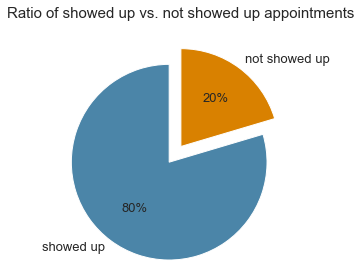

In [34]:
# Counting values for each event (shows, no-shows)
data_ap = df["no_show"].value_counts()


# Plot the pie plot
ax = plt.figure(figsize = (4.5,4.5))

ax = plt.pie(data_ap,labels = ["showed up", "not showed up"],
             explode = [0.2,0], colors = color,
             autopct='%1.0f%%',startangle = 90, 
             textprops={'fontsize': 13})
    
plt.title("Ratio of showed up vs. not showed up appointments", fontsize=15)
plt.show()


> The pie plot shows that __80%__ of all appointments ended with showed up.

In [35]:
print (f"There are {df.shape[0]} appointments in the dataset." 
       f" 20%, which equals {data_ap[1]}, ended up not showed up.")

There are 106299 appointments in the dataset. 20%, which equals 21685, ended up not showed up.


### Q 2: Male or female showed up at the doctor most often?

I will group data by gender using the _groupby()_ function and plotting results with stacked bars. 

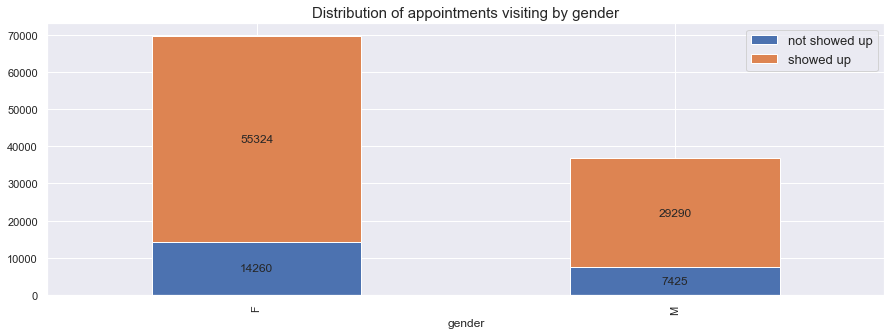

In [36]:
# Groupby "gender", "no_show"
no_show_by_gender = df.groupby(["gender", "no_show"]).size()

no_show_by_gender = no_show_by_gender.unstack().sort_values(by="gender")


# Use the "bar_stacked " function for plotting.
bar_stacked (no_show_by_gender, "Distribution of appointments visiting by gender")

> The stacked bar plot shows that females (F) make appointments with a doctor more often than males(M). The total number of appointments from __females is 69584 vs. 36715 from males__.

In [61]:
#Calculate the total number of patients by each gender
total_female = df.query('gender == "F"').count()[1]
total_male = df.query('gender == "M"').count()[1]
diff_m_f = (no_show_by_gender["showed up"][1]/no_show_by_gender["showed up"][0])*100

print(f"The total number of females is {total_female}, and the total number of males is {total_male}.\n"
      f"Female patients make the appointments {round((total_female/total_male),2)} times often.\n")

The total number of females is 69584, and the total number of males is 36715.
Female patients make the appointments 1.9 times often.



### Q 3: What is the distribution of the age for the showed-up and not showed-up appointment?

The best way to show the age distribution of data is the __histogram.__ For that purpose, I will make a new data frame with two columns: _"not_showed_up" and "showed_up."_ I will use __groupby() and get_group() functions.__

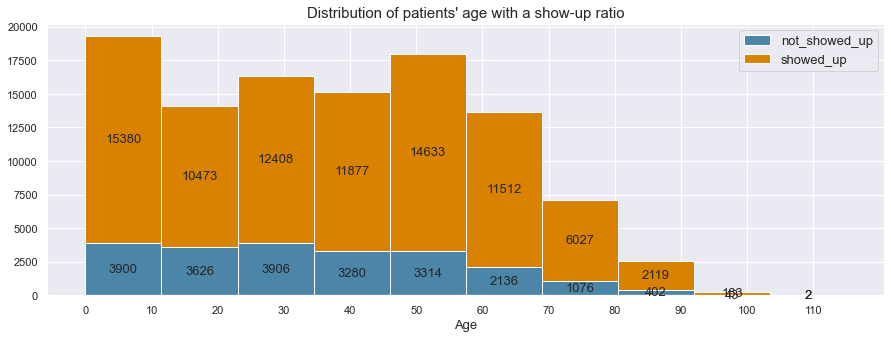

In [78]:
# Make a new data frame 
age_no_show = pd.DataFrame({"not_showed_up" : df.groupby('no_show').get_group('not showed up').age,
                             "showed_up" : df.groupby('no_show').get_group("showed up").age})

# Plot the new data frame
ax = age_no_show.plot.hist(stacked = True, color = color, bins = 10 )

# Set labels and legend

ax.set_xlabel("Age", fontsize=13)
ax.set_ylabel("", fontsize=13)
ax.set_title("Distribution of patients' age with a show-up ratio", fontsize=15)
ax.legend(loc='best',fontsize=13)

ax.set_xticks(np.arange(0, 120,10))

# Patches is everything inside of the chart
for rect in ax.patches:

    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y,
                label_text, ha='center',
                va='center', fontsize=13)

>The histogram shows that the biggest group of patients is the group between __0 and 10 years old__. Most likely, this is because parents take children to the doctor for routine visits and vaccinations. This group contains 19281 patients' appointments, and 15380 __showed up__, which is __79.7%__

>We can observe another __peak at 50-60 years old__ and then a sharp decline at 70 - 80 years old, possibly related to _the average life expectancy in Brazil in 2016,_ which was __75.23 years old__.

### Q 4: What is the average age for each gender in the showed-up and not showed-up scenarios?

In the previous question, we observed of patient's age without gender. In this question, we will consider __age distribution__ for showed-up and not the showed-up situation __for each gender__.

> Using the __query()__  function, distinguished four groups: female showed up, female not showed up, the male showed up, male not showed up.

In [39]:
# Use query() for distinguished new groups 
female_shows = df.query('gender == "F" & no_show == "showed up"') 
female_shows = female_shows[["gender", "age", "no_show"]]

female_no_show = df[(df.gender=="F")| (df.no_show =="not showed up")]
female_no_show = female_no_show[["gender", "age", "no_show"]]

male_shows = df.query('gender == "M" & no_show == "showed up"') 
male_shows = male_shows[["gender", "age", "no_show"]]

male_no_show = df.query('gender == "M" & no_show == "not showed up"') 
male_no_show = male_no_show[["gender", "age", "no_show"]]


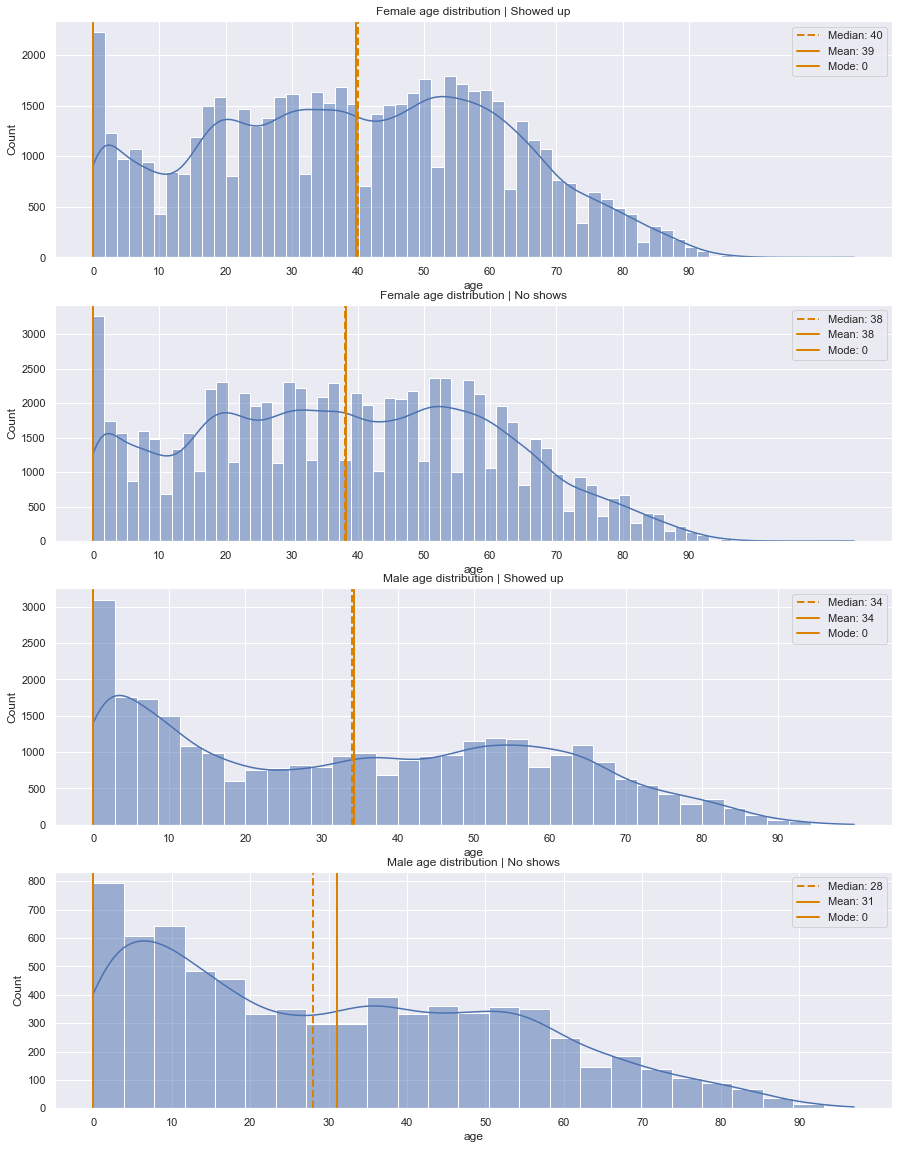

In [40]:
# Plot the data
fig, axes = plt.subplots(figsize = (15,20), ncols=1, nrows=4)

for i, dataset in enumerate([female_shows["age"],
                             female_no_show["age"],
                             male_shows["age"],
                             male_no_show["age"]]):
    
    ax = sns.histplot(dataset,kde=True, ax=axes[i])
    ax.set_xticks(np.arange(0, 100, 10))
    
    axes[0].set_title('Female age distribution | Showed up')
    axes[1].set_title('Female age distribution | No shows')
    axes[2].set_title('Male age distribution | Showed up')
    axes[3].set_title('Male age distribution | No shows')
    
    axes[i].axvline(x=dataset.median(),
                    color="#d98100",
                    label="Median: " + str(int(dataset.median())),
                    linestyle='--', linewidth=2
                )

    axes[i].axvline(x=dataset.mean(), color="#d98100",
                      label="Mean: " + str(int(dataset.mean())),
                      linestyle='-',linewidth=2
              )

    axes[i].axvline(x=statistics.mode(dataset), color="#d98100",
                      label="Mode: " + str(int(statistics.mode(dataset))),
                      linestyle='-',linewidth=2
              )

    axes[i].legend()


> The average age for the __female who showed up at the appointment is 39.7 years old__.
> The average age for the female who hasn't shown up is _38.2 years old._
> __Male__ showing slightly different numbers: __34.3 years_ old is the average age for showed up, and _31.0 for a male who hasn't shown up.__

### Q 5: Is there a relationship between diseases and appointments show up?

> There tree columns with deseases information: "hipertension", "diabetes", "alcoholism" ,"handcap".
Let's investigate how the presence or absence of disease affects the patient's punctuality. But before getting a correlation between diseases and the showed-up ratio, let's first determine how many patients have a particular disease.

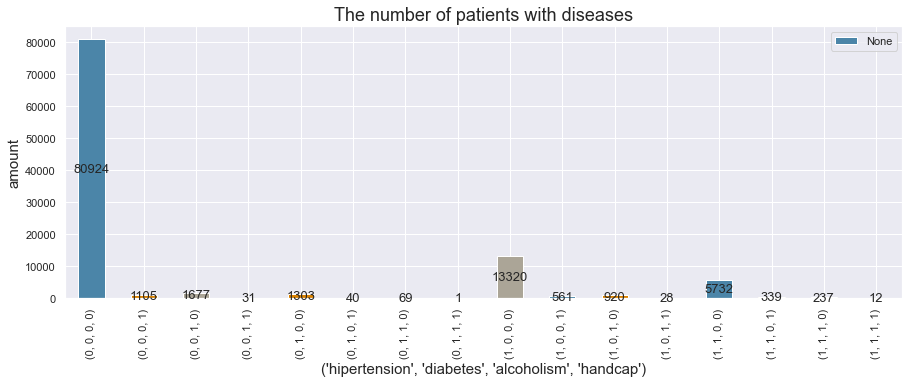

In [42]:
# Groupby diseases and plot the result
ds = df.groupby(["hipertension","diabetes", "alcoholism", "handcap"]).size()

plot_bar(ds, xlabel = ("hipertension","diabetes", "alcoholism", "handcap"),
         ylabel="amount", title = "The number of patients with diseases")


> The bar graph shows that __80927 patients don't have__ that particular disease, __76%__ of all data set. __13320 (13%)__ have only hypertension, and 5732 have hypertension and diabetes. Only 12 have all four diseases.

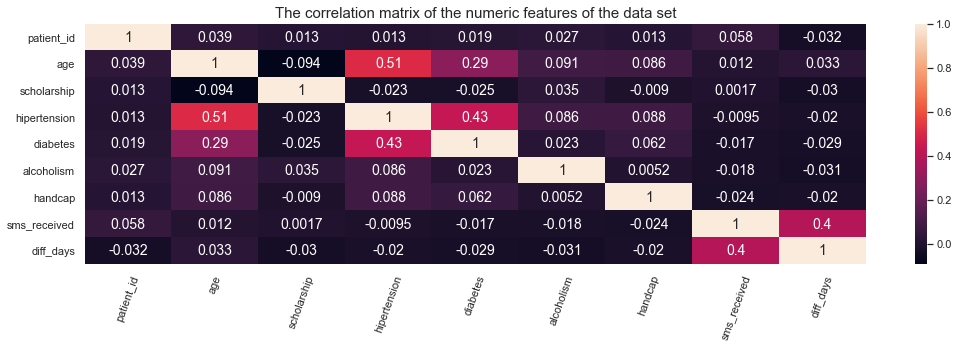

In [69]:
# Get correlation matrix
df_corr = df.corr()

ax = sns.heatmap(df_corr, annot=True, annot_kws={"size": 14})

# Fix ticklabel directions and size
plt.xticks(rotation=70)
plt.yticks(rotation=0)

ax.set_title("The correlation matrix of the numeric features of the data set", fontsize=15)

# Fits plot area to the plot, "tightly"
plt.tight_layout()


> The correlation matrix shows that the highest correlation __between "hipertension" and "age" is 0.51.__
Сorrelation between __"hipertension" and "diabetes"  equals 0.43 and between "diabetes"  and "age" is 0.29__. From this, we can conclude that "hipertension"  and "diabetes" features should be excluded in building the prediction model because they might cause redundancy.

### Q 6 : Is there a difference between who receives SMS reminders or not?

In [43]:
sms = df.groupby(["sms_received","no_show"]).size().unstack()


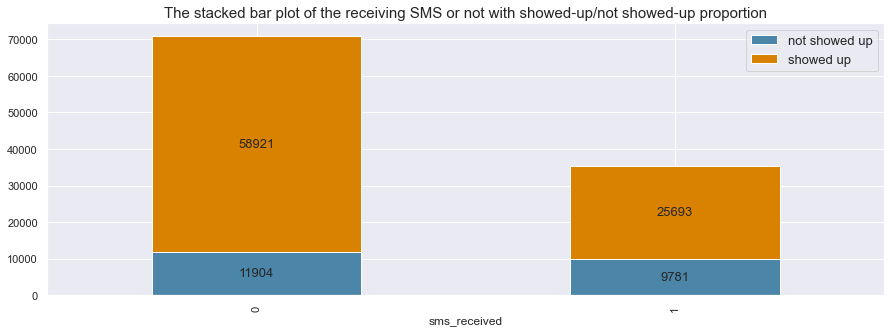

In [77]:
ax = sms.plot.bar(stacked=True, color=color)
ax.set_title("The stacked bar plot of the receiving SMS or not with showed-up/not showed-up proportion", 
              fontsize=15)

ax.legend(loc='upper right')
plt.rc('legend', fontsize=13)

# Patches is everything inside of the chart
for rect in ax.patches:
    
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'

    # ax.text(x, y, text)
    label_x = x + width / 2
    label_y = y + height / 2

    # plot only when height is greater than specified value
    if height > 0:
        ax.text(label_x, label_y,
                label_text, ha='center',
                va='center', fontsize=13)

> On the stacked bar plot: 0 - not received SMS, 1 - received SMS.

> Most people (70825) haven't received an SMS message about the appointment. But 35474 reminders about the appointment were sent. In the __not received SMS group, 83% of appointments ended up showing up__. And in the received SMS group visited doctor's office 72%. 

#### But not all patients received SMS reminders. To dig deeper, we will pay attention to the differences between scheduled appointments and actual visits.

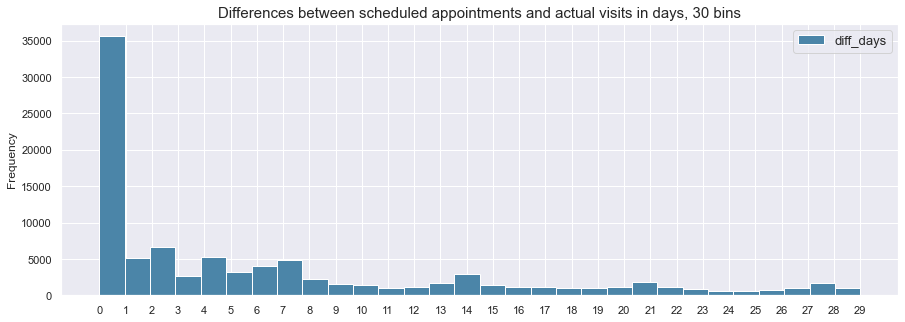

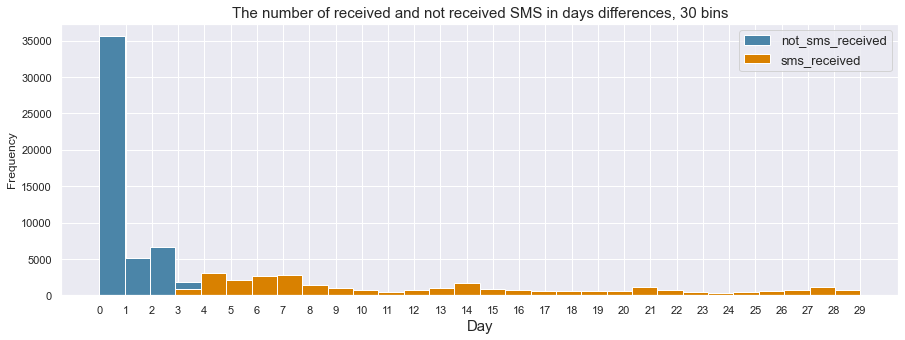

In [45]:
df_sms = pd.DataFrame({"not_sms_received" : df.groupby('sms_received').get_group(0).diff_days,
                           "sms_received" : df.groupby('sms_received').get_group(1).diff_days})
# Plot the data
ax = df.loc[(df['diff_days'] < 30)].diff_days.plot.hist(bins=30, color = color[0])
ax1 = df_sms[df_sms < 30].plot.hist(bins=30, color = color)


# Set labels and legend
ax1.set_xlabel('Day', fontsize=15)
ax.set_title("Differences between scheduled appointments and actual visits in days, 30 bins", fontsize=15)
ax1.set_title("The number of received and not received SMS in days differences, 30 bins", fontsize=15)

ax.set_xticks(np.arange(0, 30,1));
ax1.set_xticks(np.arange(0, 30,1));

ax.legend(loc='upper right')
plt.rc('legend', fontsize=13)


plt.show()

> On the second histogram, we can see that SMS reminders started sent to patients if between scheduled appointments and visiting for at least three days. But the first histogram shows that most people visited the doctor on the same day when the appointment was scheduled.
> So no, there are no such differences between sending or not SMS to patients as long as they don't start sending it even the same day.

### Q 7 : What hospitals are the most popular?

In [46]:
# Print unique number of hospitals
print(f"The unique number of hospitals is {df['neighbourhood'].nunique()}")

The unique number of hospitals is 81


In [47]:
# Calculate the number of show / no_show appointments for each neighborhood
neighborhood = df.groupby(["neighbourhood","no_show"]).size().unstack()

neighborhood = neighborhood.sort_values(by = "not showed up", ascending=False)


In [54]:
# Add a new column by dividing showed-up appointments and no-shows appointments
neighborhood["ratio"] = round(neighborhood["showed up"]/neighborhood["not showed up"],2)

neighborhood["total_app"] = neighborhood["showed up"] + neighborhood["not showed up"]



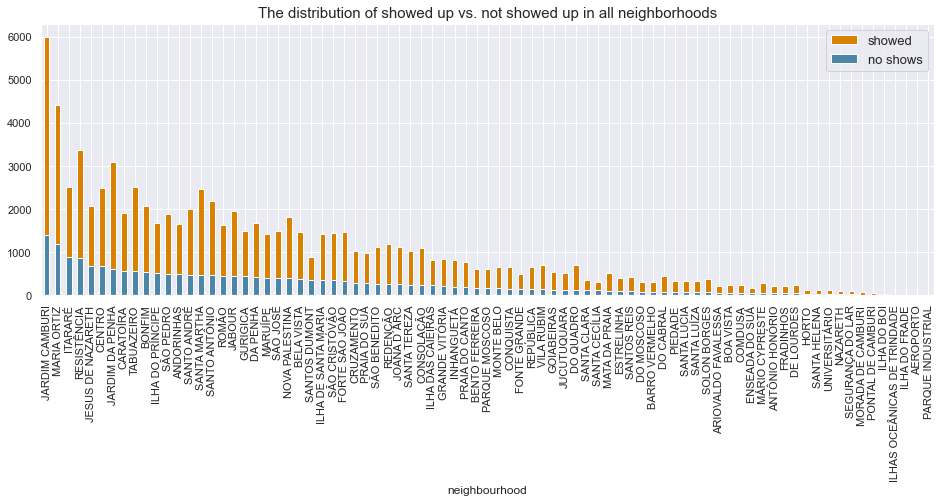

In [55]:
# Create a bar plot of appointments in each neighborhood stacked by snowed-up/no-shows
ax = neighborhood["showed up"].plot(kind='bar', figsize=(16,5), 
                          color = color[1], label = "showed");
ax = neighborhood["not showed up"].plot(kind='bar', figsize=(16,5),
                          color = color[0], label = "no shows");



plt.title("The distribution of showed up vs. not showed up in all neighborhoods", fontsize=15)

plt.legend();

In [73]:
print (f"The first 30 hospitals contain"
       f" {round (neighborhood['total_app'][:30].sum()/neighborhood['total_app'].sum(),2)} of all appointments "
       f"and {round(neighborhood['showed up'][:30].sum()/neighborhood['total_app'].sum(),2)} showed up.")

The first 30 hospitals contain 0.74 of all appointments and 0.59 showed up.


> The distribution reflects the ratio of showed-up vs. not showed up appointments in each neighborhood. 74.5 % of all appointments were made in the first 30 hospitals, and almost 60% showed up at the appointments.
#### For more profound analysis, take only the 30 most common hospitals.

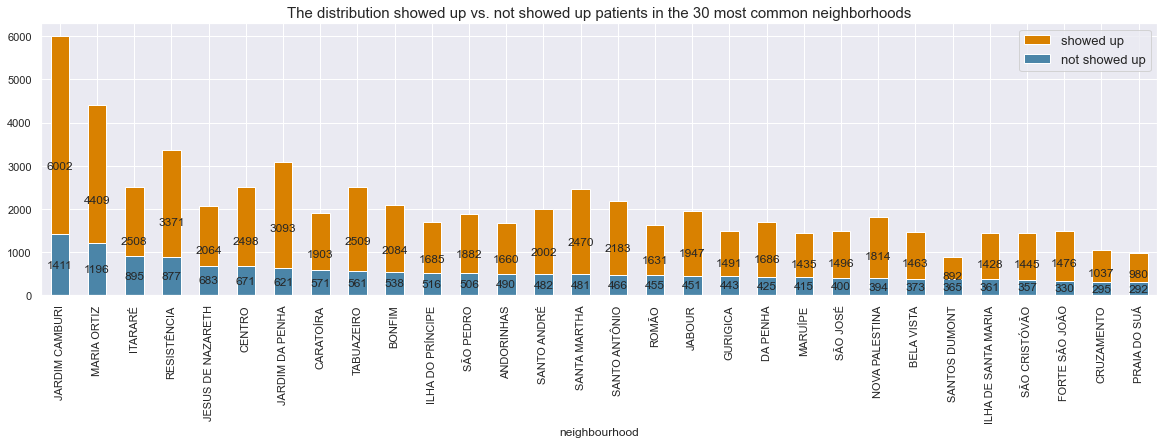

In [57]:
# Create a bar plot of appointments in the 30 most common neighborhood stacked by snowed-up/no-shows ratio.
ax = neighborhood['showed up'][:30].plot(kind='bar', figsize=(20,5), label = "showed up",
                                                        color = color[1]);
ax = neighborhood['not showed up'][:30].plot(kind='bar', figsize=(20,5),
                                                   color = color[0], label = "not showed up");


plt.title("The distribution showed up vs. not showed up patients in the 30 most common neighborhoods", fontsize=15)

plt.legend()

for rect in ax.patches:
        # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the data value and can be used as the label
    label_text = f'{height:.0f}'

    # ax.text(x, y, text)
    label_x = x + width/2
    label_y = y + height/2

    # plot only when height is greater than specified value
    if height > 0:
            ax.text(
                label_x,
                label_y,
                label_text,
                ha='center',
                va='center',
                fontsize=12
                )



> The most popular hospitals are 'JARDIM CAMBURI', 'MARIA ORTIZ', 'ITARARÉ', 'RESISTÊNCIA', 'JESUS DE NAZARETH'
The total number of hospital appointments equals  __23416.0, and 0.78 showed up__ at the doctor's office.

In [456]:
showed_five = round((neighborhood["showed up"][:5].sum() / neighborhood.total_app[:5].sum()),2)

print (f"The most popular hospitals are {neighborhood.index[:5].values.tolist()}\n"
       f"The total number of hospital appointments equals  {neighborhood.total_app[:5].sum()},"
       f" and {showed_five} showed up at the doctor's office.")

The most popular hospitals are ['JARDIM CAMBURI', 'MARIA ORTIZ', 'ITARARÉ', 'RESISTÊNCIA', 'JESUS DE NAZARETH']
The total number of hospital appointments equals  23416.0, and 0.78 showed up at the doctor's office.


<a id='conclusions'></a>
## Conclusions

> Data shows that 80% of all appointments ended up with actual visiting, but when the patient scheduled an appointment, it is still a 20% chance that the patient will not show up. If it is female, the possibility of a visit is almost 53% more than if it is a male. A significant part of patients are children under ten years old. 

> 76% patient don't have "hipertension", "diabetes", "alcoholism", "handcap" diseases. We also saw that sending SMS does not guarantee a visit.

> For building a prediction model of showing up at the doctor's office or not, I would use the following features: gender, age, difference days between scheduled and actual appointments, neighborhood (location of hospitals). I would not use the "hipertension", "diabetes" due high correlation between them, and  sms_received features due to many conditions.

## Limitations
> We have used the Medical Appointment No Shows dataset for analysis and worked with popularity, diseases, and DateTime. The investigation is limited to only the provided dataset. There are limited kinds of conditions, and data sets show that 76% of patients don't have a particular illness like: "hipertension","diabetes", "alcoholism", "handcap". But what about other diseases, like a heart condition or cancer - that information might be helpful for analysis. 

> Information about the patient's income and marital status could reveal more patterns in a patient's behavior and increase prediction probability.

## References

- https://towardsdatascience.com/clearing-the-confusion-once-and-for-all-fig-ax-plt-subplots-b122bb7783ca
- https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior
- https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlim.html
- https://stackoverflow.com/questions/60637257/how-to-plot-multiple-columns-side-by-side-with-seaborn-countplot
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
- https://www.w3schools.com/python/python_lambda.asp
- https://stackoverflow.com/questions/41622054/stacked-histogram-of-grouped-values-in-pandas
- https://www.kite.com/python/answers/how-to-delete-rows-from-a-pandas-%60dataframe%60-based-on-a-conditional-expression-in-python